In [1]:
import sys
sys.path.append('../')
import keras.keras as keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Admission_Predict.csv")

def ConvertToClasses(i):
    if(i>=0.6):
        return 1 
    return 0 #else

df["Chance of Admit "] = df["Chance of Admit "].apply(ConvertToClasses)
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,1
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,1
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,1
496,497,337,117,5,5.0,5.0,9.87,1,1
497,498,330,120,5,4.5,5.0,9.56,1,1
498,499,312,103,4,4.0,5.0,8.43,0,1


In [4]:
X = np.array(df.iloc[:, [1,2]])
Y = np.array(df.iloc[:, 8])



(355, 2)


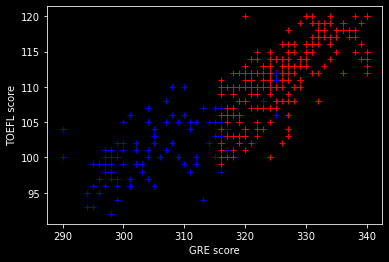

In [5]:
accepted = X[Y==1]
accepted = accepted[accepted[:,0]>315]
rejected = X[Y==0]


X = np.vstack((accepted, rejected))
print(X.shape)
Y = np.append(np.ones(len(accepted)), np.zeros(len(rejected)))

plt.style.use("dark_background")
plt.plot(accepted[:, 0], accepted[:, 1], "r+")
plt.plot(rejected[:, 0], rejected[:, 1], "b+")
plt.xlabel("GRE score")
plt.ylabel("TOEFL score")
plt.show()

In [6]:
def FeatureScaling(X):
    FeatureScaleMean = X.mean()
    FeatureScaleStd = np.std(X)
    X = (X - FeatureScaleMean) / FeatureScaleStd
    return X, FeatureScaleMean, FeatureScaleStd

In [7]:
X, FeatureScaleMean, FeatureScaleStd = FeatureScaling(X)

In [8]:
model = keras.models.Sequential([
    keras.layers.Dense(2),
    keras.layers.Dense(8),
    keras.layers.Dense(1, "sigmoid")
])

In [9]:
model.compile(learning_rate=0.3, loss="binary_crossentropy")

In [10]:
model.fit(X.T, Y, epochs=3000)

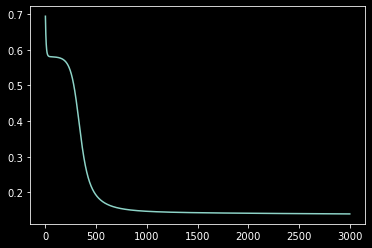

In [11]:
plt.plot(range(len(model.loss_history)), model.loss_history)
plt.show()

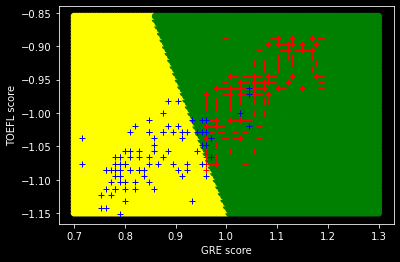

In [12]:
import matplotlib

x1 = np.arange(0.7, 1.3, 0.005)
x2 = np.arange(-1.15, -0.85, 0.005)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = np.ravel(xx1)
xx2 = np.ravel(xx2)
x = np.vstack((xx1, xx2))
y = model.predict(x)
y = np.where(y<0.5, 0, 1).reshape(-1)
cmap = []
colors = ["yellow", "green"]
for i in y:
    cmap.append(colors[i])

plt.scatter(xx1, xx2, c=y, cmap=matplotlib.colors.ListedColormap(colors))

accepted = X[Y==1]
rejected = X[Y==0]
plt.style.use("dark_background")

plt.plot(accepted[:, 0], accepted[:, 1], "r+")
plt.plot(rejected[:, 0], rejected[:, 1], "b+")
plt.xlabel("GRE score")
plt.ylabel("TOEFL score")
plt.show()